In [45]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt

***Question 1***

La charge de la batterie est très importante afin de connaître l'autonomie du système. On a 
$$
I = \dfrac{\partial Q}{\partial t}
$$
En discrétisé on a, à l'instant i 
$$
I_i = \frac{Q_i}{\Delta t}
$$
Ainsi on trouve bien que pour tous les instants entérieurs, on doit obtenir que 
$$
\sum_{i=0}^{N}\Delta t I_i \leq Q_bat
$$

***Question 2***

$a_1$ : paramétre de frottement statique. Ce paramètre varie en fonction du poids du cycliste

$a_2$ : terme de frottement de l'air ( hypothèse d'écoulement laminaire). Ce paramètre varie en fonction de la surface du cycliste

$a_3$ : terme de couple moteur. Ne varie pas en fonction du cycliste

$a_4$ : terme de couple humain ( couple du cycliste sur les pédales ). Varie en fonction de la force musculaire du cycliste

$-g\gamma (x_i)$ : terme de résistance de la pesenteur au mouvement. Ne dépend pas du cycliste car la masse a été éliminé pour obtenir ces équations

***Question 3***

On veut une assistance optimale, c'est à dire qui permettent d'aller le plus loin possible sans avoir à s'épuiser. Il faut donc chercher à minimiser $\sum_{i=0}^{N}T_i ^2$ ( le couple musculaire ), en farantissant la condition de batterie $\sum_{i=0}^{N}\Delta t I_i \leq Q_{bat}$.

Le problème d'optimisation se réécrit donc :
$$
\underset{T_i,I_i,x_i,v_i,t_i}{min} \sum_{i=0}^{N}T_i ^2  \
$$
Tel que 
$$
v_{i+1} - v_i =  \Delta t(a_1 - a_2vi + a_3Ii + a_4Ti + g\gamma (xi))\\
\sum_{i=0}^{N}\Delta t I_i - Q_{bat} = 0 \\
I_i - I_M \leq 0
$$

***Question 4***

Etude de la convexité du problème : \
On pose
$$
f : (T_i,I_i,x_i,v_i,t_i) \rightarrow \underset{T_i,I_i,x_i,v_i,t_i}{min} \sum_{i=0}^{N}T_i ^2
$$
En effectuant les dérivées partielles selon les différentes variables et en supposant $T_i$ indépendant des autres paramètres, on obtient :
$$
\nabla ^2 f(T_i,I_i,x_i,v_i,t_i) = 2 
$$
Donc 
$$
\nabla ^2 f(T_i,I_i,x_i,v_i,t_i) \ge 0 
$$
Ainsi f est bien convexe.

***Identification du modèle dynamique***

***Question 5***

Formulation du problème des moindres carrés: \
On pose,

$$
A = 
\begin{pmatrix}
1 & -v_0 & I_0 & T_0 \\
1 & -v_1 & I_1 & T_1 \\
... & ... & ... & ... \\
1 & -v_n & I_n & T_n \\
\end{pmatrix} 
$$

$$
B = 
\begin{pmatrix}
v_1 - v_0 \\ v_2 - v_1 \\ ... \\ v_{n+1} - v{n}
\end{pmatrix}
$$

$$
X = \begin{pmatrix}
a_1 \\ a_2 \\ a_3 \\ a_4
\end{pmatrix}
$$

Le problème des moindres carrés s'écrit alors :

$$
AX = B
$$

***Question 6***

In [87]:
with open('data_velo.csv', encoding = "utf8") as f :
    df = pd.read_csv(f)
    #print(df.head())
    p = len(df.columns) - 1
    n = len(df.axes[0])
    A = np.zeros((n,p))
    B = np.zeros((n,1))
    V = df['Vitesse [m/s]']
    I = df['I [A]']
    T = df['Couple pédale [Nm]']
    dt = 0.01
    #print(V)
    for i in range(len(V) - 1):
        B[i] = V[i+1] - V[i]
    for j in range(n):
        A[j][0] = 1
        A[j][1] = -V[j]
        A[j][2] = I[j]
        A[j][3] = T[j]
    A = A * dt

    X = np.linalg.lstsq(A, B, rcond = -1)[0]
    print(f"Les solutions obtenues par la méthodes des moindres carrés sont a1 = {X[0]}, a2 = {X[1]}, a3 = {X[2]}, a4 = {X[3]}")

Les solutions obtenues par la méthodes des moindres carrés sont a1 = [-0.29498251], a2 = [0.021807], a3 = [0.02869084], a4 = [0.0143385]


In [88]:
V

0       2.004592
1       2.007926
2       2.009326
3       2.006051
4       2.007267
          ...   
3246    8.785112
3247    8.776065
3248    8.777104
3249    8.772408
3250    8.771000
Name: Vitesse [m/s], Length: 3251, dtype: float64

***Question 7***

***a)***

On pose :
$$
C = A_k^TA_k \\
U = a_{k+1} \\
V = a_{k+1}^T \\
\bar{C} = C + UV^T
$$
On suppose $\bar{C}$ inversible, on peut donc appliquer la formule de Sherman-Morrison-Woodbury :
$$
\bar{C}^{-1} = C^{-1} - C^{-1}U(I + V^TA^{-1}U)^{-1}V^TA^{-1}
$$
on trouve finalement bien que :
$$
    (A_k^T A_k + a_{k+1}a_{k+1}^T)^{−1} = (A_k^T A_k)^{−1} − K_k a_{k+1}^T(A_k^T A_k)^{−1}
$$
Avec :
$
Kk = γk(A_k^T A_k)^{−1}a_{k+1} 
$ \
où 
$
γk = 1/(1 + a_{k+1}^T(A_k^T A_k)^{−1}a_{k+1}) 
$
\
Or par multiplication de matrice :
$$
A_{k+1}A_{k+1}^T = (A_k^T, ak+1)^T(A_kT, ak+1) = A_kA_k^T + a_{k+1}^Ta_{k+1}
$$
On a finalement :
$$
(A_{k+1}^TA_{k+1})^{−1} = (A_k^T A_k + a_{k+1}a_{k+1}^T)^{−1}
$$
D'où :
$$
\boxed{
(A_{k+1}^TA_{k+1})^{−1} = (A_k^T A_k + a_{k+1}a_{k+1}^T)^{−1} = (A_k^T A_k)^{−1} − K_k a_{k+1}^T(A_k^T A_k)^{−1}}
$$


***b)***

On sait que : 
$$
x_k = (A_{k}^TA_{k})^{−1}A_{k}^{T}b_{k}
$$
Alors on déduit:
$$
\begin{align*}
x_{k+1} &= (A_{k+1}^TA_{k+1})^{−1}A_{k+1}^{T}b_{k+1} \\
&= [(A_{k}^TA_{k})^{−1} − K_k a_{k+1}^T(A_k^T A_k)^{−1}][A_{k}^{T}b_{k} + a_{k+1} \tilde{b}] \\ 
&= x_k + K_k \tilde{b} (1 + a_{k+1}^T(A_k^T A_k)^{−1}a_{k+1}) - K_k a_{k+1}^{T} [(A_k^{T}A_k)^{-1}A_k^T b_k]-  K_k \tilde{b} a_{k+1}^{T}(A_k^T A_k)^{-1} a_{k+1} \\ 
&= x_k + K_k (\tilde{b} - a_{K+1}^{T} x_k)
\end{align*}
$$

On a alors identifié $x_k = (A_k^{T}A_k)^{-1}A_k^T b_k$ dans l'avant-dernier terme, le dernier se simplifiant avec un des deux premiers.

D'où notre résultat:
$$
\boxed{x_{k+1} = x_k + K_k (\tilde{b} - a_{K+1}^{T} x_k)}
$$

***c)***

On peut remarquer qu'en posant $U_{k} = (A_{k}^{T} A_k)^{-1}$, alors on obtient selon les formules précédentes $U_{k+1}$ sans avoir besoin d'inverser de matrice. 

Ainsi, nous allons baser notre nouvel algorithme là-dessus, en prenant un $x_0$ proche de la solution des moindres carrés :

In [3]:
#Paramétrage initial
A0 = A[:4, :5]
Uk = inv(np.dot(A0, np.transpose(A0)))
xk = np.array([-0.1, 0.01, 0.01, 0.01]) #On initialise x0
N = 3251 #Nombre de données

***Question 8***

In [4]:
#On itère N fois
for k in range(N):
    ak = A[k, :]
    bk = B[k]
    Kk = np.dot(Uk, ak) / (1 + np.dot(np.dot(np.transpose(ak),Uk),ak))
    Uk = Uk - np.dot(np.dot(Kk,np.transpose(ak)),Uk)
    xk = xk + Kk*(bk - np.dot(np.transpose(ak),xk))

#Affichage du résultat final:
print(xk)

[-0.09632364  0.00216428  0.00917734  0.01499101]


On trouve au final des résultats différents avec la question 6, mais on peut déjà avoir "en direct" des résultats plutôt fiables.
En effet, si on prend le résultat à diverses périodes alors que nous n'avons pas pris en compte toutes les valeurs, on obtient :

In [5]:
for k in range(N):
    ak = A[k, :]
    bk = B[k]
    Kk = np.dot(Uk, ak) / (1 + np.dot(np.dot(np.transpose(ak),Uk),ak))
    Uk = Uk - np.dot(np.dot(Kk,np.transpose(ak)),Uk)
    xk = xk + Kk*(bk - np.dot(np.transpose(ak),xk))
    if k in [500, 1000, 1500, 2000, 2500, 3000]:
        print(xk)

[-0.09664489  0.00284884  0.00924915  0.0145551 ]
[-0.09688067  0.00335129  0.00930186  0.01423515]
[-0.09659982  0.00275281  0.00923908  0.01461625]
[-0.09639987  0.00232672  0.00919438  0.01488758]
[-0.09631248  0.0021405   0.00917485  0.01500615]
[-0.09618496  0.00186877  0.00914635  0.01517918]


Ainsi, on obtient de bons résultats en direct, c'est une progression !

***Question 9***

In [6]:
#Paramétrage:
a1 = -0.2949
a2 = 0.0218
a3 = 0.02869
a4 = 0.01433
T = 500
dt = 2.5
x0 = 0
xf = 500
Qbat = 500
IM = 30
g = 9.81
N = int(T / dt)

En supposant la pente nulle, on annule l'effet de la force de pesanteur car la réaction du support compense parfaitement celle-ci.
On ne va donc pas avoir de variable $x_i$ présente, donc on réduit à $(T_i, v_i, I_i)$ les variables de notre problème de minimisation (les $t_i$ sont fixés par notre $dt$).
On va alors utiliser la librairie CasADi afin de résoudre ce problème (solveur non linéaire).

On définit ainsi des variables de CasADi    $v = (v_1, v_2, ..., v_N)$ et $I_{i} = (I_{{i}_{1}}, I_{{i}_{2}}, ..., I_{{i}_{N}})$ \
On initialise le couple moteur quadratique total fourni $T^2$ à 0 et on somme ensuite sur les itérations, comme l'illustre l'algorithme suivant :

In [7]:
from casadi import *
import time

ModuleNotFoundError: No module named 'casadi'

In [145]:
#Optimisation du premier cas: Pente nulle
opti = casadi.Opti();

v = opti.variable(N)
Ii = opti.variable(N)
T2 = 0

for i in range(N - 1):
    T2 += (((v[i + 1] - v[i]) / (dt) - a1 + a2 * v[i] - a3 * Ii[i]) / a4)**2

Vtot = 0
opti.minimize(T2)
opti.subject_to(v[0] == 0.0)
Q = 0

for i in range(N - 1):
    opti.subject_to(Ii[i] >= 0)  #On pose nos inégalités sur l'intensité
    opti.subject_to(Ii[i] <= IM)
    Vtot += v[i]
    Q += dt * Ii[i]
    opti.subject_to(Q <= Qbat) #On pose nos inéga
    opti.subject_to(v[i] >= 0)
    
Vmoy = Vtot /N

opti.subject_to(Vmoy == 5)  #Il faut parcourir les 500m en 100s
    

#opti.set_initial(v, v0) #On part à une vitesse nulle


opti.solver('ipopt');
sol = opti.solve();

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      200
Number of nonzeros in inequality constraint Jacobian.:    20497
Number of nonzeros in Lagrangian Hessian.............:      996

Total number of variables............................:      400
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:      796
        inequality constraints with only lower bounds:      398
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      398

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

In [144]:
print(sol.value(v), sol.value(Ii))

[-7.91401572e-36  7.39869241e-02  1.47619982e-01  2.20899176e-01
  2.93824512e-01  3.66395991e-01  4.38613617e-01  5.10477395e-01
  5.81987327e-01  6.53143416e-01  7.23945667e-01  7.94394081e-01
  8.64488664e-01  9.34229418e-01  1.00361635e+00  1.07264945e+00
  1.14132874e+00  1.20965421e+00  1.27762587e+00  1.34524372e+00
  1.41250776e+00  1.47941800e+00  1.54597444e+00  1.61217709e+00
  1.67802594e+00  1.74352100e+00  1.80866227e+00  1.87344976e+00
  1.93788347e+00  2.00196340e+00  2.06568956e+00  2.12906194e+00
  2.19208056e+00  2.25474541e+00  2.31705650e+00  2.37901382e+00
  2.44061739e+00  2.50186721e+00  2.56276328e+00  2.62330559e+00
  2.68349416e+00  2.74332899e+00  2.80281008e+00  2.86193744e+00
  2.92071106e+00  2.97913094e+00  3.03719710e+00  3.09490954e+00
  3.15226825e+00  3.20927324e+00  3.26592451e+00  3.32222207e+00
  3.37816592e+00  3.43375605e+00  3.48899249e+00  3.54387521e+00
  3.59840424e+00  3.65257956e+00  3.70640119e+00  3.75986913e+00
  3.81298337e+00  3.86574

On observe que sur du plat, nous allons directement atteindre l'intensité maximale du courant passant dans le moteur électrique.

Cela semble plutôt cohérent, l'assistance électrique se doit d'aider au mieux si nous souhaitons réduire au maximum les efforts et donc le couple exercé sur la pédale.

***Question 10***

In [10]:
#Nouveaux paramètres
g1 = 0.02
g2 = 0.01
s1 = 100
s2 = 31.5
m1 = 187.5
m2 = 375

In [11]:
def gamma(x):
    return g1 * np.exp(-((x - m1)**2)/ (s1)**2) + g2 * np.exp(-((x - m2)**2)/ (s2)**2)

In [12]:
def gammad(x):
    return g1 * (-2*(x - m1)/((s1)**2)) * np.exp(-((x - m1)**2)/ (s1)**2) + g2 * (-2*(x - m2)/((s2)**2)) * np.exp(-((x - m2)**2)/ (s2)**2)

Voici la pente que nous retenons pour cette question :

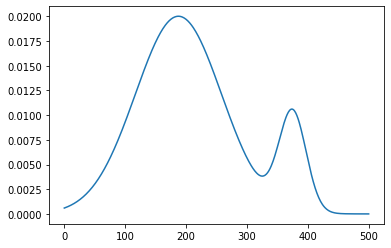

In [164]:
X = np.linspace(0, 500, 501)
Y = [gamma(x) for x in X]
plt.plot(X, Y)
plt.show()

Ici on va essayer de garder en tête les $x_i$ de l'itération précédente afin d'appliquer la formule qui est énoncée.
Nous avions d'abord penser à rédiger une matrice $X_k$ de dimension $(n, 2)$, telle que:
$$X_k.ei = \begin{pmatrix}
x_i \\ x_{i+1} 
\end{pmatrix}$$
On note $e_i$ le vecteur ayant pour seule composante 1 à la i-ième ligne.
Mais malgré nos efforts afin d'essayer d'obtenir à chaque nouvelle itération la valeur du vecteur $x_k$ de la précédente, nous n'y sommes malheureusement pas arrivés.

En effet, nous avons scruté les outils disponibles sur CasADi sans trouver cette option. Alors nous avons voulu faire une boucle sur un nombre d'itération fixé en stoppant à chaque fois le solveur au bout d'une seule itération afin de pouvoir sauvegarder les valeurs des $(x_{k_i})$, sans succès ...

CasADi utilisant un solveur non linéaire, cela en est peut-être la cause.

In [139]:
#Initialisation:
X = np.zeros(N)

In [162]:
#Optimisation du second cas: Pente non nulle
X = np.zeros(N)

for k in range(15):
    opti = casadi.Opti();

    x = opti.variable(N)
    v = opti.variable(N)
    Ii = opti.variable(N)
    T2 = 0

    for i in range(N - 1):
        T2 += (((v[i + 1] - v[i]) / (dt) - a1 + a2 * v[i] - a3 * Ii[i] + g * (gamma(X[i]) + gammad(X[i])* (x[i] - X[i]))) / a4)**2

    Vtot = 0
    opti.minimize(T2)
    opti.subject_to(v[0] == 0.0)
    Q = 0

    for i in range(N - 1):
        opti.subject_to(Ii[i] >= 0.0)
        opti.subject_to(Ii[i] <= IM)
        Vtot += v[i]
        Q += dt * Ii[i]
        opti.subject_to(Q <= Qbat)
        opti.subject_to(v[i] >= 0.)
        opti.subject_to(x[i + 1] == x[i] + dt * v[i])

    Vmoy = Vtot /N

    opti.subject_to(Vmoy == 5)
    opti.subject_to(x[N - 1] == xf)
    opti.subject_to(x[0] == x0)
    
    options = {"print_time": False, "ipopt": {"max_iter": 2}} 
    opti.solver('ipopt', options);
    sol = opti.solve();
    X = opti.debug.value(x)
    

    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      801
Number of nonzeros in inequality constraint Jacobian.:    20497
Number of nonzeros in Lagrangian Hessian.............:     1792

Total number of variables............................:      600
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      205
Total number of inequality constraints...............:      796
        inequality constraints with only lower bounds:      398
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      398

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

RuntimeError: Error in Opti::solve [OptiNode] at .../casadi/core/optistack.cpp:159:
.../casadi/core/optistack_internal.cpp:999: Assertion "return_success(accept_limit)" failed:
Solver failed. You may use opti.debug.value to investigate the latest values of variables. return_status is 'Maximum_Iterations_Exceeded'

In [163]:
opti.debug.value(v)

array([-1.76620496e-06,  3.25310314e-01,  6.37636603e-01,  9.37645471e-01,
        1.22596870e+00,  1.50320412e+00,  1.76991760e+00,  2.02664474e+00,
        2.27389256e+00,  2.51214100e+00,  2.74184437e+00,  2.96343275e+00,
        3.17731327e+00,  3.38387131e+00,  3.58347171e+00,  3.77645982e+00,
        3.96316258e+00,  4.14388947e+00,  4.31893347e+00,  4.48857192e+00,
        4.65306737e+00,  4.81266835e+00,  4.96761014e+00,  5.11811547e+00,
        5.26439517e+00,  5.40664885e+00,  5.54506546e+00,  5.67982386e+00,
        5.81109338e+00,  5.93903431e+00,  6.06379841e+00,  6.18552933e+00,
        6.30436305e+00,  6.42042832e+00,  6.53384700e+00,  6.64473448e+00,
        6.75319996e+00,  6.85934686e+00,  6.96327305e+00,  7.06507120e+00,
        7.16482904e+00,  7.26262961e+00,  7.35855153e+00,  7.45266924e+00,
        7.54505320e+00,  7.63577011e+00,  7.72488313e+00,  7.81245205e+00,
        7.89853347e+00,  7.98318097e+00,  8.06644529e+00,  8.14837446e+00,
        8.22901394e+00,  

***Question 11***

Pour conclure sur ce sujet, nous allons utiliser les réponses de la question 9.
On observe alors que la meilleure manière de réduire le couple en gardant une vitesse moyenne suffisante est de booster autant que possible l'intensité parcourant le moteur électrique. Cela semble plutôt cohérent, puisque maximiser l'aide du moteur revient en général à minimiser l'effort produit, donc le couple exercé sur les pédales du vélo.

Le rôle de l'assistance électrique devient donc primordial sur du plat (et sur des montées).
La réponse de la question 10 aurait donc pu confirmer cela, surtout si nous avions observé une diminution de l'intensité lors des descentes par exemple. 